<a href="https://colab.research.google.com/github/asheta66/Capuchin-search-algorithm-CapSA-/blob/master/Handling_missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color="maroon"><h4 align="center">Handling Missing Data - fillna, interpolate, dropna</font>

In [ ]:
import pandas as pd
import numpy as np

## What does "NaN" mean?
"NaN" is not a string, rather it's a special value: numpy.nan.
It stands for "Not a Number" and indicates a missing value.
read_csv detects missing values (by default) when reading the file, and replaces them with this special value.

In [ ]:
ufo = pd.read_csv('C:\Users\Admin\Desktop\Data\COPD\Test1.csv')

SyntaxError: ignored

In [ ]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [ ]:
# 'isnull' returns a DataFrame of booleans (True if missing, False if not missing)
ufo.isnull().tail()

NameError: ignored

In [ ]:
# 'nonnull' returns the opposite of 'isnull' (True if not missing, False if missing)
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [ ]:
# count the number of missing values in each Series
ufo.isnull().sum(axis=0)

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

This calculation works because:

The sum method for a DataFrame operates on axis=0 by default (and thus produces column sums).
In order to add boolean values, pandas converts True to 1 and False to 0.


In [ ]:
ufo[ufo["City"].isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


# Sample CSV with NaN values

In [ ]:
csvFile="https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
df = pd.read_csv(csvFile)
print(df)

         day  temperature  windspeed   event
0   1/1/2017         32.0        6.0    Rain
1   1/4/2017          NaN        9.0   Sunny
2   1/5/2017         28.0        NaN    Snow
3   1/6/2017          NaN        7.0     NaN
4   1/7/2017         32.0        NaN    Rain
5   1/8/2017          NaN        NaN   Sunny
6   1/9/2017          NaN        NaN     NaN
7  1/10/2017         34.0        8.0  Cloudy
8  1/11/2017         40.0       12.0   Sunny


## Changing Index to be by date 

In [ ]:
print(type(df['day']))
print(type(df['day'][0]))

<class 'pandas.core.series.Series'>
<class 'str'>


In [ ]:
df = pd.read_csv(csvFile,parse_dates=['day'])

In [ ]:
print(type(df['day']))
print(type(df['day'][0]))

<class 'pandas.core.series.Series'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
#  earlier the index column was a series of number but later it has been replaced with day
df.set_index('day',inplace=True)
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


## <font color="blue">fillna</font>

<font color="purple">**Fill all NaN with one specific value**</font>

In [ ]:
new_df = df.fillna(0)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,0
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,0
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


<font color="purple">**Fill na using column names and dict**</font>

In [ ]:
new_df = df.fillna({
        'temperature': 0,
        'windspeed': 0,
        'event': 'No Event'
    })
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,No Event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,No Event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


<font color="purple">**Use method to determine how to fill na values**</font>

In [ ]:
new_df = df.fillna(method="ffill")     #forward fill take the previous values  to fill missing value
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,7.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,7.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [ ]:
new_df = df.fillna(method="bfill",axis="index")    #use next valid observation to fill previous gap
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


<font color="purple">**Use of axis**</font>

In [ ]:
new_df = df.fillna(method="bfill", axis="columns") # axis is either "index" or "columns"
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-04,9,9,Sunny
2017-01-05,28,Snow,Snow
2017-01-06,7,7,NaN
2017-01-07,32,Rain,Rain
2017-01-08,Sunny,Sunny,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34,8,Cloudy
2017-01-11,40,12,Sunny


<font color="purple">**limit parameter**</font>

In [ ]:
new_df = df.fillna(method="ffill",limit=1)     #limit set how many values to carry to replace NaN
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,NaN,Sunny
2017-01-09,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


## <font color="blue">interpolate</font>
Use interpolate() function to fill the missing values 

In [ ]:
new_df = df.interpolate()     # using linear method by default
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,7.00,Sunny
2017-01-05,28.000000,7.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


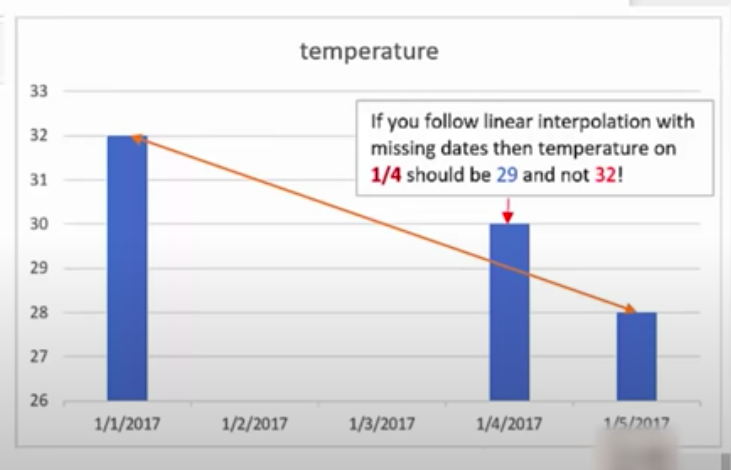

In [ ]:
new_df = df.interpolate(method="time") 
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


**Notice that in above temperature on 2017-01-04 is 29 instead of 30 (in plain linear interpolate)**

**There are many other methods for interpolation such as quadratic, piecewise_polynomial, cubic etc. 
Just google "dataframe interpolate" to see complete documentation**

## <font color="blue">dropna</font>

In [ ]:
new_df = df.dropna() # drop if any value in row is NaN
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [ ]:
new_df = df.dropna(how='all')    #drop only  rows where all data are missed (index is not counted)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,7.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [ ]:
new_df = df.dropna(thresh=1)    # at least  count of threshold of none N/A we will keep
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,7.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [ ]:
new_df = df.dropna(thresh=2)    # at least  count of threshold of none N/A we will keep
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-07,32.0,NaN,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### ufo 

In [ ]:
ufo.shape


(18241, 5)

In [ ]:
ufo.dropna( how='all').shape     #No effect


(18241, 5)

In [ ]:
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape


(18237, 5)

In [ ]:
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape


(15576, 5)

## <font color="blue">Inserting Missing Dates</font>

In [ ]:
dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df.reindex(idx)

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,7.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


In [ ]:
csvFile="https://raw.githubusercontent.com/codebasics/py/master/pandas/6_handling_missing_data_replace/weather_data.csv"
df = pd.read_csv(csvFile)
print(df)

        day  temperature  windspeed  event
0  1/1/2017           32          6   Rain
1  1/2/2017       -99999          7  Sunny
2  1/3/2017           28     -99999   Snow
3  1/4/2017       -99999          7      0
4  1/5/2017           32     -99999   Rain
5  1/6/2017           31          2  Sunny
6  1/6/2017           34          5      0


In [ ]:
new_df = df.replace(-99999, value=np.NaN)
print(new_df)
#new_df = df.replace(to_replace=[-99999,-88888], value=0)     #more than 1 value


        day  temperature  windspeed  event
0  1/1/2017         32.0        6.0   Rain
1  1/2/2017          NaN        7.0  Sunny
2  1/3/2017         28.0        NaN   Snow
3  1/4/2017          NaN        7.0      0
4  1/5/2017         32.0        NaN   Rain
5  1/6/2017         31.0        2.0  Sunny
6  1/6/2017         34.0        5.0      0


## Replacing by column

In [ ]:
new_df = df.replace({
        'temperature': -99999,
        'windspeed': -99999,
        'event': '0'
    }, np.nan)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,NaN
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,NaN


## Replacing by using mapping



In [ ]:
new_df = df.replace({
        -99999: np.nan,
        'no event': 'Sunny',
    })
new_df